# Sequence Lenght = 5, Codeword Length = 15, p(BSC parameter) ∈ {0.01, 0.05, 0.1, 0.2}

I am going to vary the training samples and train the model again and again untill the accuracy saturates beyond a certain N(trainin samples per class) 
Here # of classes = 4

In [5]:
import os
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
print(os.listdir("/kaggle/input/bsc-0-01-15-seq-len"))

['bsc_p0.40_codewords1.csv', 'bsc_p0.20_codewords2.csv', 'bsc_p0.01_codewords1.csv', 'bsc_p0.05_codewords1.csv', 'bsc_p0.01_codewords2.csv', 'bsc_p0.30_codewords1.csv', 'bsc_p0.10_codewords1.csv', 'bsc_p0.20_codewords1.csv', 'bsc_p0.10_codewords2.csv', 'bsc_p0.30_codewords2.csv', 'bsc_p0.40_codewords2.csv', 'bsc_p0.05_codewords2.csv']


### p=0.01

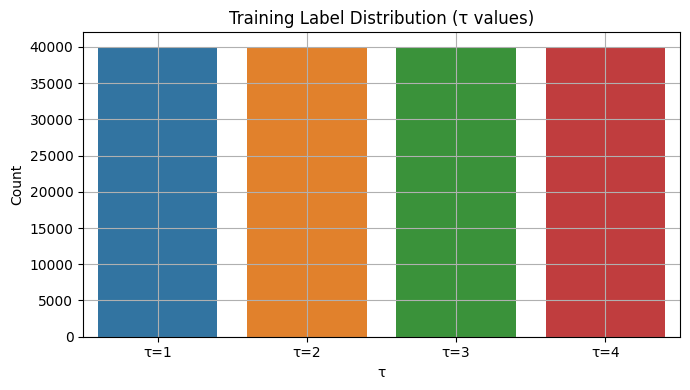

Training Epochs:   2%|▏         | 1/50 [00:14<11:36, 14.21s/it]

Epoch  1 | Train Loss: 1.3887 | Val Accuracy: 0.2792


Training Epochs:   4%|▍         | 2/50 [00:28<11:23, 14.25s/it]

Epoch  2 | Train Loss: 1.3294 | Val Accuracy: 0.5183


Training Epochs:   6%|▌         | 3/50 [00:42<11:06, 14.17s/it]

Epoch  3 | Train Loss: 0.9564 | Val Accuracy: 0.7037


Training Epochs:   8%|▊         | 4/50 [00:56<10:52, 14.18s/it]

Epoch  4 | Train Loss: 0.7577 | Val Accuracy: 0.7712


Training Epochs:  10%|█         | 5/50 [01:11<10:39, 14.21s/it]

Epoch  5 | Train Loss: 0.6235 | Val Accuracy: 0.8151


Training Epochs:  12%|█▏        | 6/50 [01:25<10:25, 14.21s/it]

Epoch  6 | Train Loss: 0.5221 | Val Accuracy: 0.8493


Training Epochs:  14%|█▍        | 7/50 [01:39<10:08, 14.16s/it]

Epoch  7 | Train Loss: 0.4439 | Val Accuracy: 0.8710


Training Epochs:  16%|█▌        | 8/50 [01:53<09:54, 14.15s/it]

Epoch  8 | Train Loss: 0.3807 | Val Accuracy: 0.8957


Training Epochs:  18%|█▊        | 9/50 [02:07<09:40, 14.17s/it]

Epoch  9 | Train Loss: 0.3291 | Val Accuracy: 0.9065


Training Epochs:  20%|██        | 10/50 [02:21<09:26, 14.17s/it]

Epoch 10 | Train Loss: 0.2904 | Val Accuracy: 0.9249


Training Epochs:  22%|██▏       | 11/50 [02:36<09:13, 14.18s/it]

Epoch 11 | Train Loss: 0.2577 | Val Accuracy: 0.9358


Training Epochs:  24%|██▍       | 12/50 [02:50<08:58, 14.17s/it]

Epoch 12 | Train Loss: 0.2289 | Val Accuracy: 0.9457


Training Epochs:  26%|██▌       | 13/50 [03:04<08:43, 14.16s/it]

Epoch 13 | Train Loss: 0.2069 | Val Accuracy: 0.9521


Training Epochs:  28%|██▊       | 14/50 [03:18<08:29, 14.14s/it]

Epoch 14 | Train Loss: 0.1885 | Val Accuracy: 0.9586


Training Epochs:  30%|███       | 15/50 [03:32<08:14, 14.14s/it]

Epoch 15 | Train Loss: 0.1730 | Val Accuracy: 0.9615


Training Epochs:  32%|███▏      | 16/50 [03:46<08:02, 14.19s/it]

Epoch 16 | Train Loss: 0.1624 | Val Accuracy: 0.9647


Training Epochs:  34%|███▍      | 17/50 [04:01<07:48, 14.19s/it]

Epoch 17 | Train Loss: 0.1527 | Val Accuracy: 0.9692


Training Epochs:  36%|███▌      | 18/50 [04:15<07:33, 14.18s/it]

Epoch 18 | Train Loss: 0.1449 | Val Accuracy: 0.9708


Training Epochs:  38%|███▊      | 19/50 [04:29<07:20, 14.20s/it]

Epoch 19 | Train Loss: 0.1372 | Val Accuracy: 0.9700


Training Epochs:  40%|████      | 20/50 [04:43<07:05, 14.17s/it]

Epoch 20 | Train Loss: 0.1329 | Val Accuracy: 0.9720


Training Epochs:  42%|████▏     | 21/50 [04:57<06:51, 14.18s/it]

Epoch 21 | Train Loss: 0.1276 | Val Accuracy: 0.9726


Training Epochs:  44%|████▍     | 22/50 [05:11<06:37, 14.19s/it]

Epoch 22 | Train Loss: 0.1226 | Val Accuracy: 0.9733


Training Epochs:  46%|████▌     | 23/50 [05:26<06:23, 14.19s/it]

Epoch 23 | Train Loss: 0.1195 | Val Accuracy: 0.9738


Training Epochs:  48%|████▊     | 24/50 [05:40<06:08, 14.16s/it]

Epoch 24 | Train Loss: 0.1168 | Val Accuracy: 0.9744


Training Epochs:  50%|█████     | 25/50 [05:54<05:54, 14.17s/it]

Epoch 25 | Train Loss: 0.1148 | Val Accuracy: 0.9747


Training Epochs:  52%|█████▏    | 26/50 [06:08<05:40, 14.18s/it]

Epoch 26 | Train Loss: 0.1100 | Val Accuracy: 0.9739


Training Epochs:  54%|█████▍    | 27/50 [06:22<05:25, 14.16s/it]

Epoch 27 | Train Loss: 0.1078 | Val Accuracy: 0.9742


Training Epochs:  54%|█████▍    | 27/50 [06:36<05:38, 14.70s/it]

Epoch 28 | Train Loss: 0.1062 | Val Accuracy: 0.9738
Early stopping triggered.



Final Test Accuracy: 0.9740



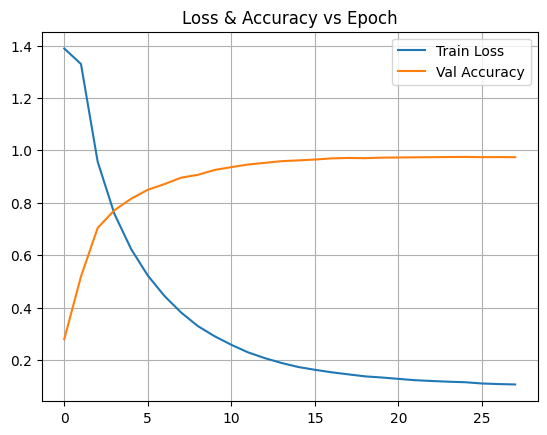

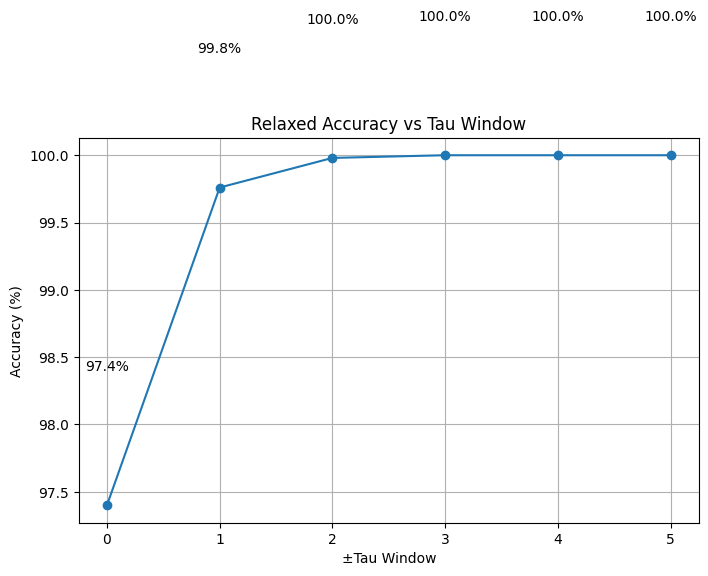

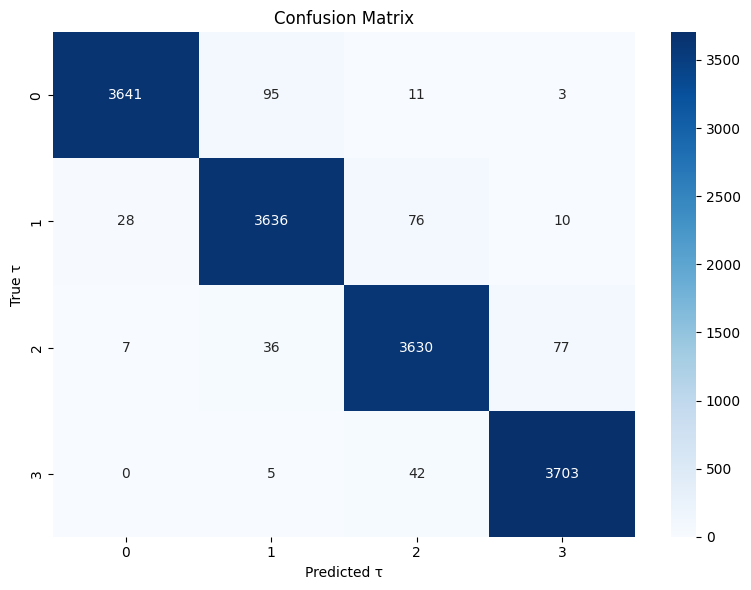

In [32]:
# ========== Configuration ==========
SEED = 0
T = 5  # Sequence length = number of codewords per sample
NUM_CLASSES = T - 1
N_TRAIN = 200000
N_TEST = 15000
BATCH_SIZE = 64  # Batch size for training
PATIENCE = 4   # Early Stopping Patience
VAL_DELTA = 0.002  # Minimum required improvement in val accuracy (0.2%) to reset patience
LEARNING_RATE = 1e-4 # Initial learning rate for Adam (scheduler may reduce it later)
MAX_EPOCHS = 50  # Max number of epochs

# ========== Set Seeds ==========
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ========== Load Data ==========
csv1 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.01_codewords1.csv").values
csv2 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.01_codewords2.csv").values
FEATURE_SIZE = csv1.shape[1]

# ========== Generate CPD Dataset ==========
def generate_data_cpd(N, csv1_data, csv2_data, T):
    Data, Labels = [], []
    samples_per_tau = N // (T - 1)
    for tau in range(1, T):
        for _ in range(samples_per_tau):
            idx1 = np.random.choice(len(csv1_data), tau, replace=True)
            idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
            data_point = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(data_point)
            Labels.append(tau - 1)
    return np.array(Data), np.array(Labels)

X, y = generate_data_cpd(N_TRAIN + N_TEST, csv1, csv2, T)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=N_TEST, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, stratify=y_trainval)

# ========== Plot: Label Distribution ==========
plt.figure(figsize=(7, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("τ")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES), labels=[f"τ={i+1}" for i in range(NUM_CLASSES)])
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Dataset Wrapper ==========
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(ChangepointDataset(X_val, y_val), batch_size=BATCH_SIZE)
test_loader = DataLoader(ChangepointDataset(X_test, y_test), batch_size=BATCH_SIZE)

# ========== Model ==========
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1D(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)
        return self.classifier(x)

# ========== Training ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = 0
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    model.train()
    running_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ========== Evaluation ==========
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ========== Relaxed Accuracy ==========
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

# ========== Plots ==========
plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("±Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted τ")
plt.ylabel("True τ")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


### Summary of the Performance of the above model : 


***T = 5, p = 0.01, del_window ∈ [1,5], 50 Epochs(if early stopping not triggered)*** 
<pre>For N'(training samples/class) = 200    Accuracy = 21.0, 59.0, 85.0, 100.0 
For N'(training samples/class) = 2000      Accuracy =  29.0, 61.0, 90.0, 100.0
For N'(training samples/class) = 4000      Accuracy =  27.1, 58.6, 85.5, 100.0
For N'(training samples/class) = 6000      Accuracy =  85.8, 98.9, 99.8, 100.0
For N'(training samples/class) = 8000      Accuracy =  88.8, 99.1, 99.7, 100.0
For N'(training samples/class) = 10000      Accuracy =  91.90, 99.2, 100.0, 100.0
For N'(training samples/class) = 15000      Accuracy =  96.7, 99.5, 99.8, 100.0
For N'(training samples/class) = 20000      Accuracy =  97, 99.6, 100.0, 100.0
For N'(training samples/class) = 25000      Accuracy =  96.7, 99.7, 100.0, 100.0
For N'(training samples/class) = 30000      Accuracy =  97.2, 99.7, 100.0, 100.0
For N'(training samples/class) = 35000      Accuracy =  97.3, 99.8, 100.0, 100.0
For N'(training samples/class) = 40000      Accuracy =  97.4, 99.8, 100.0, 100.0<pre>

Plot for Pd vs N (training samples per class)

### p=0.05

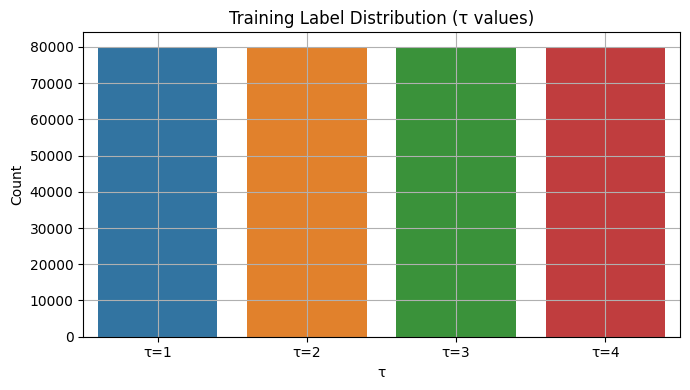

Training Epochs:   2%|▏         | 1/50 [00:28<23:00, 28.16s/it]

Epoch  1 | Train Loss: 1.3872 | Val Accuracy: 0.2787


Training Epochs:   4%|▍         | 2/50 [00:56<22:36, 28.25s/it]

Epoch  2 | Train Loss: 1.2421 | Val Accuracy: 0.5708


Training Epochs:   6%|▌         | 3/50 [01:24<22:07, 28.24s/it]

Epoch  3 | Train Loss: 0.9391 | Val Accuracy: 0.7062


Training Epochs:   8%|▊         | 4/50 [01:52<21:37, 28.21s/it]

Epoch  4 | Train Loss: 0.7694 | Val Accuracy: 0.7782


Training Epochs:  10%|█         | 5/50 [02:21<21:09, 28.22s/it]

Epoch  5 | Train Loss: 0.6531 | Val Accuracy: 0.8114


Training Epochs:  12%|█▏        | 6/50 [02:49<20:41, 28.21s/it]

Epoch  6 | Train Loss: 0.5778 | Val Accuracy: 0.8321


Training Epochs:  14%|█▍        | 7/50 [03:17<20:11, 28.18s/it]

Epoch  7 | Train Loss: 0.5330 | Val Accuracy: 0.8412


Training Epochs:  16%|█▌        | 8/50 [03:45<19:44, 28.20s/it]

Epoch  8 | Train Loss: 0.5031 | Val Accuracy: 0.8477


Training Epochs:  18%|█▊        | 9/50 [04:13<19:16, 28.21s/it]

Epoch  9 | Train Loss: 0.4799 | Val Accuracy: 0.8496


Training Epochs:  20%|██        | 10/50 [04:42<18:48, 28.22s/it]

Epoch 10 | Train Loss: 0.4641 | Val Accuracy: 0.8529


Training Epochs:  22%|██▏       | 11/50 [05:10<18:19, 28.20s/it]

Epoch 11 | Train Loss: 0.4505 | Val Accuracy: 0.8555


Training Epochs:  24%|██▍       | 12/50 [05:38<17:51, 28.20s/it]

Epoch 12 | Train Loss: 0.4370 | Val Accuracy: 0.8609


Training Epochs:  26%|██▌       | 13/50 [06:06<17:23, 28.21s/it]

Epoch 13 | Train Loss: 0.4267 | Val Accuracy: 0.8623


Training Epochs:  28%|██▊       | 14/50 [06:34<16:55, 28.21s/it]

Epoch 14 | Train Loss: 0.4170 | Val Accuracy: 0.8638


Training Epochs:  30%|███       | 15/50 [07:03<16:28, 28.23s/it]

Epoch 15 | Train Loss: 0.4074 | Val Accuracy: 0.8676


Training Epochs:  32%|███▏      | 16/50 [07:31<15:58, 28.18s/it]

Epoch 16 | Train Loss: 0.3996 | Val Accuracy: 0.8686


Training Epochs:  34%|███▍      | 17/50 [07:59<15:29, 28.18s/it]

Epoch 17 | Train Loss: 0.3908 | Val Accuracy: 0.8730


Training Epochs:  36%|███▌      | 18/50 [08:27<15:01, 28.17s/it]

Epoch 18 | Train Loss: 0.3803 | Val Accuracy: 0.8749


Training Epochs:  38%|███▊      | 19/50 [08:55<14:33, 28.19s/it]

Epoch 19 | Train Loss: 0.3725 | Val Accuracy: 0.8770


Training Epochs:  40%|████      | 20/50 [09:24<14:06, 28.21s/it]

Epoch 20 | Train Loss: 0.3660 | Val Accuracy: 0.8801


Training Epochs:  42%|████▏     | 21/50 [09:52<13:37, 28.20s/it]

Epoch 21 | Train Loss: 0.3590 | Val Accuracy: 0.8827


Training Epochs:  44%|████▍     | 22/50 [10:20<13:09, 28.21s/it]

Epoch 22 | Train Loss: 0.3527 | Val Accuracy: 0.8846


Training Epochs:  46%|████▌     | 23/50 [10:48<12:41, 28.20s/it]

Epoch 23 | Train Loss: 0.3474 | Val Accuracy: 0.8841


Training Epochs:  48%|████▊     | 24/50 [11:16<12:12, 28.18s/it]

Epoch 24 | Train Loss: 0.3424 | Val Accuracy: 0.8861


Training Epochs:  50%|█████     | 25/50 [11:45<11:45, 28.23s/it]

Epoch 25 | Train Loss: 0.3382 | Val Accuracy: 0.8870


Training Epochs:  52%|█████▏    | 26/50 [12:13<11:17, 28.23s/it]

Epoch 26 | Train Loss: 0.3355 | Val Accuracy: 0.8883


Training Epochs:  54%|█████▍    | 27/50 [12:41<10:49, 28.22s/it]

Epoch 27 | Train Loss: 0.3333 | Val Accuracy: 0.8869


Training Epochs:  56%|█████▌    | 28/50 [13:09<10:20, 28.20s/it]

Epoch 28 | Train Loss: 0.3294 | Val Accuracy: 0.8911


Training Epochs:  58%|█████▊    | 29/50 [13:37<09:51, 28.19s/it]

Epoch 29 | Train Loss: 0.3271 | Val Accuracy: 0.8889


Training Epochs:  60%|██████    | 30/50 [14:06<09:24, 28.25s/it]

Epoch 30 | Train Loss: 0.3223 | Val Accuracy: 0.8911


Training Epochs:  62%|██████▏   | 31/50 [14:34<08:56, 28.22s/it]

Epoch 31 | Train Loss: 0.3212 | Val Accuracy: 0.8901


Training Epochs:  62%|██████▏   | 31/50 [15:02<09:13, 29.12s/it]

Epoch 32 | Train Loss: 0.3193 | Val Accuracy: 0.8916
Early stopping triggered.



Final Test Accuracy: 0.8900



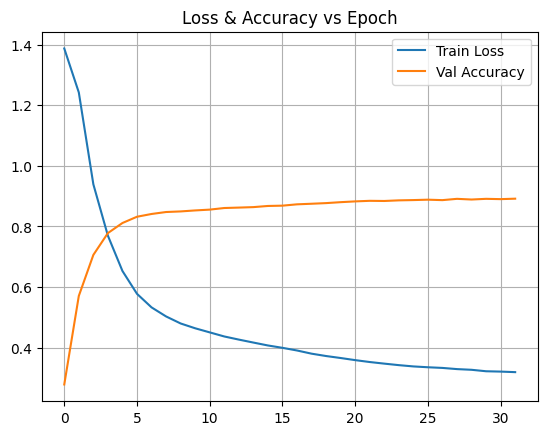

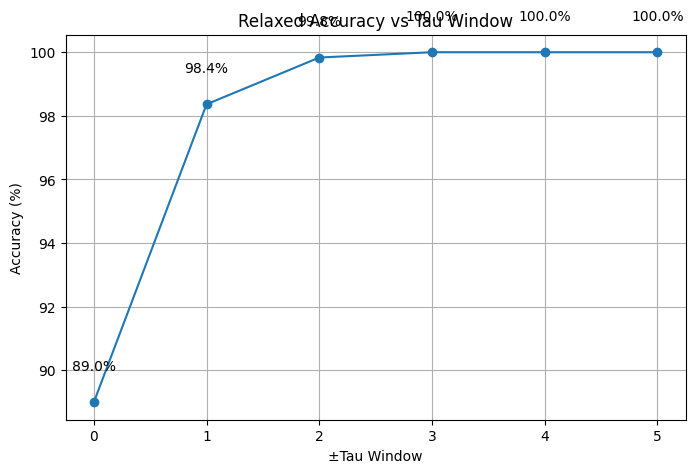

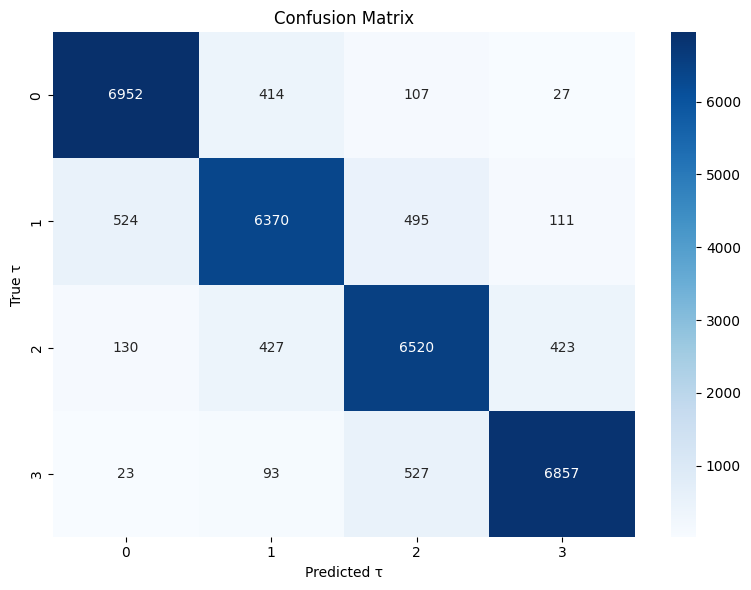

In [47]:
# ========== Configuration ==========
SEED = 0
T = 5  # Sequence length = number of codewords per sample
NUM_CLASSES = T - 1
N_TRAIN = 400000
N_TEST = 30000
BATCH_SIZE = 64  # Batch size for training
PATIENCE = 4   # Early Stopping Patience
VAL_DELTA = 0.002  # Minimum required improvement in val accuracy (0.2%) to reset patience
LEARNING_RATE = 1e-4 # Initial learning rate for Adam (scheduler may reduce it later)
MAX_EPOCHS = 50  # Max number of epochs

# ========== Set Seeds ==========
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ========== Load Data ==========
csv1 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.05_codewords1.csv").values
csv2 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.05_codewords2.csv").values
FEATURE_SIZE = csv1.shape[1]

# ========== Generate CPD Dataset ==========
def generate_data_cpd(N, csv1_data, csv2_data, T):
    Data, Labels = [], []
    samples_per_tau = N // (T - 1)
    for tau in range(1, T):
        for _ in range(samples_per_tau):
            idx1 = np.random.choice(len(csv1_data), tau, replace=True)
            idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
            data_point = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(data_point)
            Labels.append(tau - 1)
    return np.array(Data), np.array(Labels)

X, y = generate_data_cpd(N_TRAIN + N_TEST, csv1, csv2, T)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=N_TEST, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, stratify=y_trainval)

# ========== Plot: Label Distribution ==========
plt.figure(figsize=(7, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("τ")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES), labels=[f"τ={i+1}" for i in range(NUM_CLASSES)])
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Dataset Wrapper ==========
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(ChangepointDataset(X_val, y_val), batch_size=BATCH_SIZE)
test_loader = DataLoader(ChangepointDataset(X_test, y_test), batch_size=BATCH_SIZE)

# ========== Model ==========
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1D(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)
        return self.classifier(x)

# ========== Training ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = 0
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    model.train()
    running_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ========== Evaluation ==========
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ========== Relaxed Accuracy ==========
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

# ========== Plots ==========
plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("±Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted τ")
plt.ylabel("True τ")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


### Summary of the Performance of the above model : 

***T = 5, p = 0.05, del_window ∈ [1,5], 50 Epochs(if early stopping not triggered)***  </br>
For N'(training samples/class) = 200      Accuracy = 22, 70, 88, 100 </br>
For N'(training samples/class) = 2000      Accuracy = 26.9, 67.6, 89.8, 100 </br>
For N'(training samples/class) = 4000      Accuracy =  26.9, 62.1, 86.5, 100</br>
For N'(training samples/class) = 6000      Accuracy =  25.5, 64.3, 88.1, 100</br>
For N'(training samples/class) = 8000      Accuracy =  70.6, 94.3, 98.8, 100</br>
For N'(training samples/class) = 10000      Accuracy =  74.9, 95.8, 99.4, 100</br>
For N'(training samples/class) = 15000      Accuracy =  81.2, 96.1, 99.3, 100</br>
For N'(training samples/class) = 20000      Accuracy =  84.8, 97.8, 99.7, 100</br>
For N'(training samples/class) = 25000      Accuracy =  86.1, 97.8, 99.7, 100</br>
For N'(training samples/class) = 30000      Accuracy =  85.5, 97.9, 99.7, 100</br>
For N'(training samples/class) = 35000      Accuracy =  86.0, 97.9, 99.7, 100</br>
For N'(training samples/class) = 40000      Accuracy =  86.7, 98.0, 99.7, 100</br>
For N'(training samples/class) = 50000      Accuracy =  87.5, 98.0, 99.8, 100</br>
For N'(training samples/class) = 60000      Accuracy =  88.2, 98.3, 99.8, 100</br>
For N'(training samples/class) = 80000      Accuracy =  89.0, 98.4, 99.8, 100</br>

### p=0.1

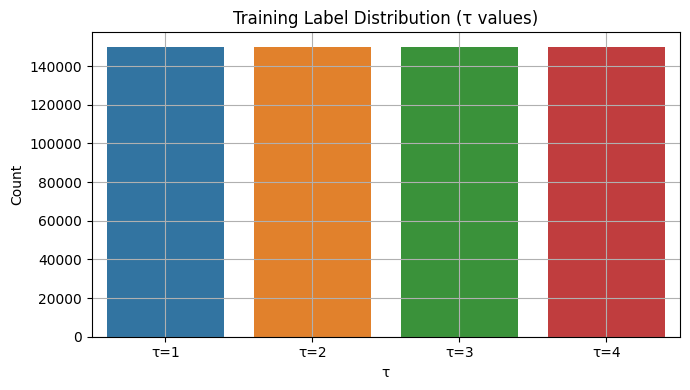

Training Epochs:   2%|▏         | 1/50 [00:55<44:58, 55.07s/it]

Epoch  1 | Train Loss: 1.3868 | Val Accuracy: 0.2805


Training Epochs:   4%|▍         | 2/50 [01:49<43:58, 54.97s/it]

Epoch  2 | Train Loss: 1.3261 | Val Accuracy: 0.4333


Training Epochs:   6%|▌         | 3/50 [02:44<42:54, 54.77s/it]

Epoch  3 | Train Loss: 1.1588 | Val Accuracy: 0.5657


Training Epochs:   8%|▊         | 4/50 [03:39<42:00, 54.78s/it]

Epoch  4 | Train Loss: 1.0362 | Val Accuracy: 0.6258


Training Epochs:  10%|█         | 5/50 [04:33<40:58, 54.63s/it]

Epoch  5 | Train Loss: 0.9540 | Val Accuracy: 0.6539


Training Epochs:  12%|█▏        | 6/50 [05:28<40:00, 54.55s/it]

Epoch  6 | Train Loss: 0.8990 | Val Accuracy: 0.6706


Training Epochs:  14%|█▍        | 7/50 [06:21<38:54, 54.30s/it]

Epoch  7 | Train Loss: 0.8588 | Val Accuracy: 0.6892


Training Epochs:  16%|█▌        | 8/50 [07:15<37:57, 54.24s/it]

Epoch  8 | Train Loss: 0.8241 | Val Accuracy: 0.7046


Training Epochs:  18%|█▊        | 9/50 [08:09<37:00, 54.15s/it]

Epoch  9 | Train Loss: 0.7934 | Val Accuracy: 0.7187


Training Epochs:  20%|██        | 10/50 [09:04<36:13, 54.34s/it]

Epoch 10 | Train Loss: 0.7685 | Val Accuracy: 0.7289


Training Epochs:  22%|██▏       | 11/50 [09:59<35:23, 54.45s/it]

Epoch 11 | Train Loss: 0.7522 | Val Accuracy: 0.7338


Training Epochs:  24%|██▍       | 12/50 [10:53<34:29, 54.47s/it]

Epoch 12 | Train Loss: 0.7408 | Val Accuracy: 0.7418


Training Epochs:  26%|██▌       | 13/50 [11:48<33:32, 54.39s/it]

Epoch 13 | Train Loss: 0.7319 | Val Accuracy: 0.7445


Training Epochs:  28%|██▊       | 14/50 [12:42<32:36, 54.35s/it]

Epoch 14 | Train Loss: 0.7250 | Val Accuracy: 0.7453


Training Epochs:  30%|███       | 15/50 [13:36<31:43, 54.37s/it]

Epoch 15 | Train Loss: 0.7191 | Val Accuracy: 0.7496


Training Epochs:  32%|███▏      | 16/50 [14:31<30:48, 54.37s/it]

Epoch 16 | Train Loss: 0.7145 | Val Accuracy: 0.7508


Training Epochs:  34%|███▍      | 17/50 [15:25<29:52, 54.33s/it]

Epoch 17 | Train Loss: 0.7095 | Val Accuracy: 0.7525


Training Epochs:  36%|███▌      | 18/50 [16:18<28:48, 54.02s/it]

Epoch 18 | Train Loss: 0.7055 | Val Accuracy: 0.7533


Training Epochs:  38%|███▊      | 19/50 [17:12<27:51, 53.93s/it]

Epoch 19 | Train Loss: 0.7023 | Val Accuracy: 0.7524


Training Epochs:  40%|████      | 20/50 [18:06<27:01, 54.05s/it]

Epoch 20 | Train Loss: 0.6992 | Val Accuracy: 0.7537


Training Epochs:  40%|████      | 20/50 [19:01<28:31, 57.06s/it]

Epoch 21 | Train Loss: 0.6960 | Val Accuracy: 0.7541
Early stopping triggered.



Final Test Accuracy: 0.7516



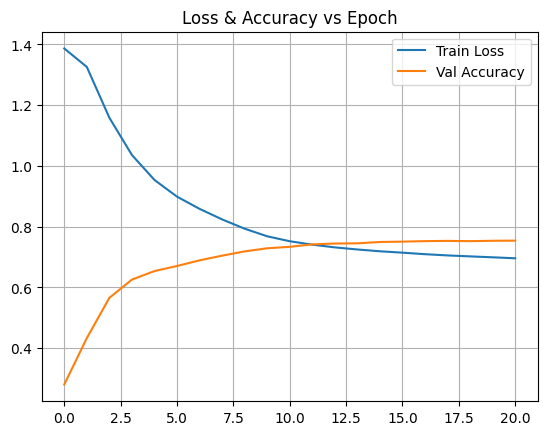

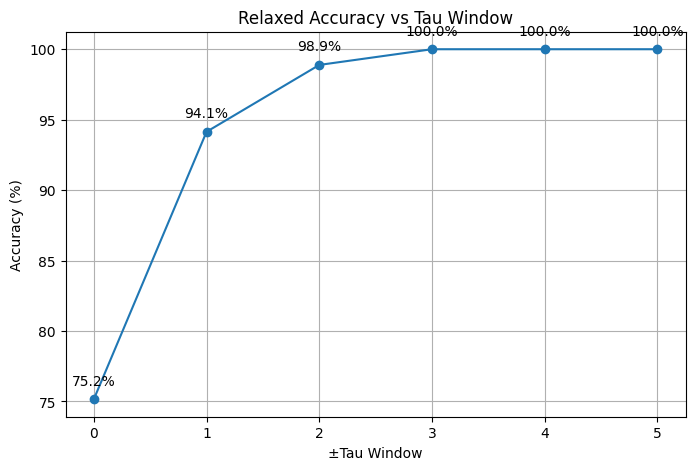

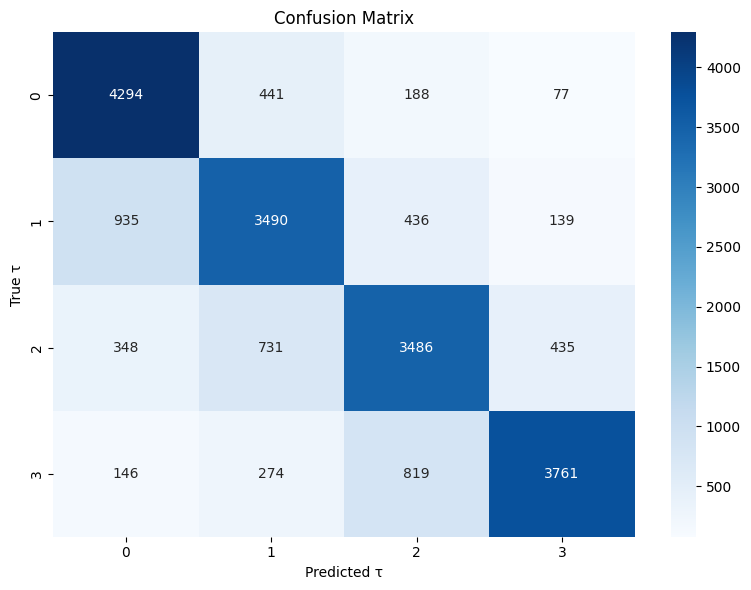

In [16]:
# ========== Configuration ==========
SEED = 0
T = 5  # Sequence length = number of codewords per sample
NUM_CLASSES = T - 1
N_TRAIN = 750000
N_TEST = 20000
BATCH_SIZE = 64  # Batch size for training
PATIENCE = 4   # Early Stopping Patience
VAL_DELTA = 0.002  # Minimum required improvement in val accuracy (0.2%) to reset patience
LEARNING_RATE = 1e-4 # Initial learning rate for Adam (scheduler may reduce it later)
MAX_EPOCHS = 50  # Max number of epochs

# ========== Set Seeds ==========
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ========== Load Data ==========
csv1 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.10_codewords1.csv").values
csv2 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.10_codewords2.csv").values
FEATURE_SIZE = csv1.shape[1]

# ========== Generate CPD Dataset ==========
def generate_data_cpd(N, csv1_data, csv2_data, T):
    Data, Labels = [], []
    samples_per_tau = N // (T - 1)
    for tau in range(1, T):
        for _ in range(samples_per_tau):
            idx1 = np.random.choice(len(csv1_data), tau, replace=True)
            idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
            data_point = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(data_point)
            Labels.append(tau - 1)
    return np.array(Data), np.array(Labels)

X, y = generate_data_cpd(N_TRAIN + N_TEST, csv1, csv2, T)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=N_TEST, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, stratify=y_trainval)

# ========== Plot: Label Distribution ==========
plt.figure(figsize=(7, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("τ")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES), labels=[f"τ={i+1}" for i in range(NUM_CLASSES)])
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Dataset Wrapper ==========
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(ChangepointDataset(X_val, y_val), batch_size=BATCH_SIZE)
test_loader = DataLoader(ChangepointDataset(X_test, y_test), batch_size=BATCH_SIZE)

# ========== Model ==========
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1D(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)
        return self.classifier(x)

# ========== Training ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = 0
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    model.train()
    running_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ========== Evaluation ==========
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ========== Relaxed Accuracy ==========
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

# ========== Plots ==========
plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("±Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted τ")
plt.ylabel("True τ")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


***T = 5, p = 0.10, del_window ∈ [1,5], 50 Epochs(if early stopping not triggered)***  </br>
For N'(training samples/class) = 200      Accuracy = 29.5, 61.5, 88.0, 100</br>
For N'(training samples/class) = 2000      Accuracy = 24.7, 63.4, 87.7, 100 </br>
For N'(training samples/class) = 4000      Accuracy =  25.0, 60.8, 84.6, 100</br>
For N'(training samples/class) = 6000      Accuracy =  26.2 63.4, 88.1, 100</br>
For N'(training samples/class) = 8000      Accuracy =  26.6, 64.0, 88.2, 100</br>
For N'(training samples/class) = 10000      Accuracy =  27.0, 60.8, 84.4, 100</br>
For N'(training samples/class) = 15000      Accuracy =  57.5, 88.0, 97.5, 100</br>
For N'(training samples/class) = 20000      Accuracy =  60.03, 89.0, 97.6, 100</br>
For N'(training samples/class) = 25000      Accuracy =  65.6, 90.7, 98.2, 100</br>
For N'(training samples/class) = 30000      Accuracy =  63.9, 89.7, 97.6, 100</br>
For N'(training samples/class) = 40000      Accuracy =  67.6, 91.3, 98.3, 100</br>
For N'(training samples/class) = 50000      Accuracy =  71.5, 92.8, 98.6, 100</br>
For N'(training samples/class) = 60000      Accuracy =  70.7, 92.3, 98.4, 100</br>
For N'(training samples/class) = 70000      Accuracy =  73.9, 93.6, 98.8, 100</br>
For N'(training samples/class) = 80000      Accuracy =  73.6, 93.7, 98.8, 100</br>
For N'(training samples/class) = 90000      Accuracy =  74.2, 93.6, 98.7, 100</br>
For N'(training samples/class) = 120000      Accuracy =  74.7, 93.6, 98.7, 100</br>
For N'(training samples/class) = 150000      Accuracy =  75.2, 94.1, 98.9, 100</br>

### p=0.2

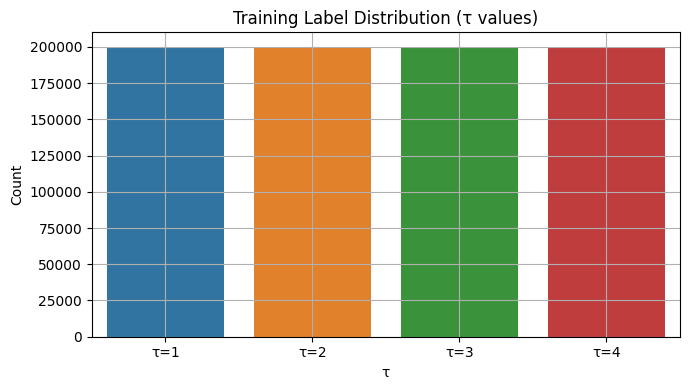

Training Epochs:   2%|▏         | 1/50 [01:12<59:19, 72.64s/it]

Epoch  1 | Train Loss: 1.3871 | Val Accuracy: 0.2506


Training Epochs:   4%|▍         | 2/50 [02:25<58:12, 72.76s/it]

Epoch  2 | Train Loss: 1.3864 | Val Accuracy: 0.2513


Training Epochs:   6%|▌         | 3/50 [03:38<57:02, 72.82s/it]

Epoch  3 | Train Loss: 1.3863 | Val Accuracy: 0.2525


Training Epochs:   8%|▊         | 4/50 [04:51<55:54, 72.93s/it]

Epoch  4 | Train Loss: 1.3851 | Val Accuracy: 0.2713


Training Epochs:  10%|█         | 5/50 [06:04<54:38, 72.86s/it]

Epoch  5 | Train Loss: 1.3818 | Val Accuracy: 0.2847


Training Epochs:  12%|█▏        | 6/50 [07:17<53:27, 72.91s/it]

Epoch  6 | Train Loss: 1.3770 | Val Accuracy: 0.2949


Training Epochs:  14%|█▍        | 7/50 [08:29<52:13, 72.87s/it]

Epoch  7 | Train Loss: 1.3693 | Val Accuracy: 0.3121


Training Epochs:  16%|█▌        | 8/50 [09:42<50:52, 72.69s/it]

Epoch  8 | Train Loss: 1.3590 | Val Accuracy: 0.3292


Training Epochs:  18%|█▊        | 9/50 [10:55<49:46, 72.84s/it]

Epoch  9 | Train Loss: 1.3485 | Val Accuracy: 0.3403


Training Epochs:  20%|██        | 10/50 [12:08<48:38, 72.96s/it]

Epoch 10 | Train Loss: 1.3388 | Val Accuracy: 0.3515


Training Epochs:  22%|██▏       | 11/50 [13:21<47:24, 72.95s/it]

Epoch 11 | Train Loss: 1.3295 | Val Accuracy: 0.3612


Training Epochs:  24%|██▍       | 12/50 [14:35<46:24, 73.27s/it]

Epoch 12 | Train Loss: 1.3204 | Val Accuracy: 0.3704


Training Epochs:  26%|██▌       | 13/50 [15:48<45:09, 73.23s/it]

Epoch 13 | Train Loss: 1.3102 | Val Accuracy: 0.3811


Training Epochs:  28%|██▊       | 14/50 [17:01<43:48, 73.01s/it]

Epoch 14 | Train Loss: 1.3003 | Val Accuracy: 0.3897


Training Epochs:  30%|███       | 15/50 [18:14<42:35, 73.01s/it]

Epoch 15 | Train Loss: 1.2905 | Val Accuracy: 0.3984


Training Epochs:  32%|███▏      | 16/50 [19:27<41:20, 72.96s/it]

Epoch 16 | Train Loss: 1.2805 | Val Accuracy: 0.4038


Training Epochs:  34%|███▍      | 17/50 [20:39<40:00, 72.75s/it]

Epoch 17 | Train Loss: 1.2702 | Val Accuracy: 0.4116


Training Epochs:  36%|███▌      | 18/50 [21:51<38:44, 72.63s/it]

Epoch 18 | Train Loss: 1.2611 | Val Accuracy: 0.4185


Training Epochs:  38%|███▊      | 19/50 [23:03<37:27, 72.50s/it]

Epoch 19 | Train Loss: 1.2535 | Val Accuracy: 0.4217


Training Epochs:  40%|████      | 20/50 [24:15<36:11, 72.37s/it]

Epoch 20 | Train Loss: 1.2487 | Val Accuracy: 0.4258


Training Epochs:  42%|████▏     | 21/50 [25:28<34:58, 72.37s/it]

Epoch 21 | Train Loss: 1.2452 | Val Accuracy: 0.4277


Training Epochs:  44%|████▍     | 22/50 [26:40<33:45, 72.36s/it]

Epoch 22 | Train Loss: 1.2418 | Val Accuracy: 0.4299


Training Epochs:  46%|████▌     | 23/50 [27:52<32:32, 72.31s/it]

Epoch 23 | Train Loss: 1.2392 | Val Accuracy: 0.4320


Training Epochs:  48%|████▊     | 24/50 [29:04<31:18, 72.23s/it]

Epoch 24 | Train Loss: 1.2367 | Val Accuracy: 0.4315


Training Epochs:  50%|█████     | 25/50 [30:17<30:05, 72.22s/it]

Epoch 25 | Train Loss: 1.2347 | Val Accuracy: 0.4328


Training Epochs:  52%|█████▏    | 26/50 [31:29<28:55, 72.31s/it]

Epoch 26 | Train Loss: 1.2325 | Val Accuracy: 0.4335


Training Epochs:  54%|█████▍    | 27/50 [32:42<27:47, 72.49s/it]

Epoch 27 | Train Loss: 1.2306 | Val Accuracy: 0.4340


Training Epochs:  56%|█████▌    | 28/50 [33:55<26:37, 72.61s/it]

Epoch 28 | Train Loss: 1.2286 | Val Accuracy: 0.4332


Training Epochs:  58%|█████▊    | 29/50 [35:07<25:22, 72.52s/it]

Epoch 29 | Train Loss: 1.2270 | Val Accuracy: 0.4351


Training Epochs:  60%|██████    | 30/50 [36:20<24:11, 72.55s/it]

Epoch 30 | Train Loss: 1.2258 | Val Accuracy: 0.4355


Training Epochs:  62%|██████▏   | 31/50 [37:32<22:57, 72.50s/it]

Epoch 31 | Train Loss: 1.2245 | Val Accuracy: 0.4360


Training Epochs:  64%|██████▍   | 32/50 [38:45<21:44, 72.50s/it]

Epoch 32 | Train Loss: 1.2236 | Val Accuracy: 0.4354


Training Epochs:  66%|██████▌   | 33/50 [39:57<20:30, 72.36s/it]

Epoch 33 | Train Loss: 1.2219 | Val Accuracy: 0.4353


Training Epochs:  68%|██████▊   | 34/50 [41:09<19:17, 72.32s/it]

Epoch 34 | Train Loss: 1.2209 | Val Accuracy: 0.4351


Training Epochs:  68%|██████▊   | 34/50 [42:22<19:56, 74.77s/it]

Epoch 35 | Train Loss: 1.2199 | Val Accuracy: 0.4348
Early stopping triggered.



Final Test Accuracy: 0.4339



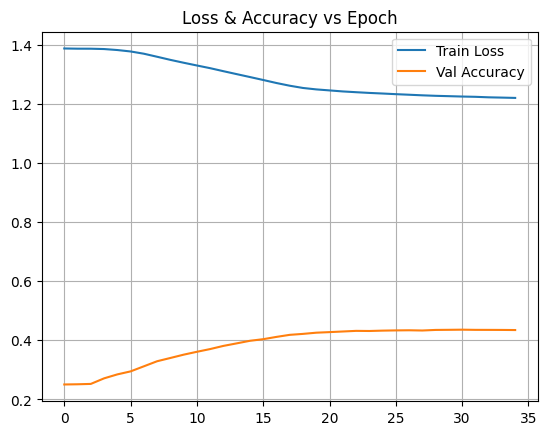

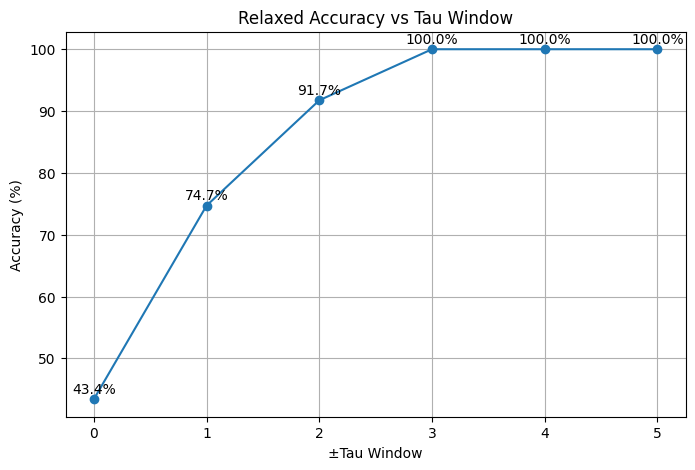

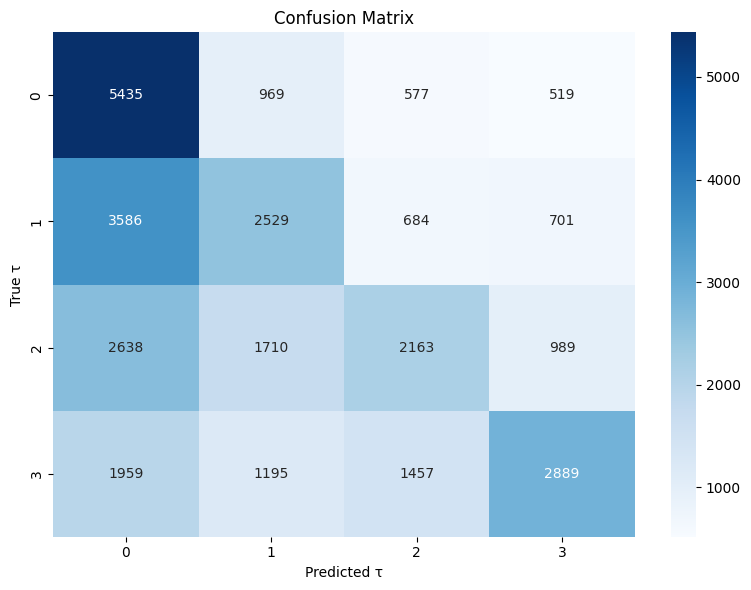

In [8]:
# ========== Configuration ==========
SEED = 0
T = 5  # Sequence length = number of codewords per sample
NUM_CLASSES = T - 1
N_TRAIN = 1000000
N_TEST = 30000
BATCH_SIZE = 64  # Batch size for training
PATIENCE = 4   # Early Stopping Patience
VAL_DELTA = 0.002  # Minimum required improvement in val accuracy (0.2%) to reset patience
LEARNING_RATE = 1e-4 # Initial learning rate for Adam (scheduler may reduce it later)
MAX_EPOCHS = 50  # Max number of epochs

# ========== Set Seeds ==========
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ========== Load Data ==========
csv1 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.20_codewords1.csv").values
csv2 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.20_codewords2.csv").values
FEATURE_SIZE = csv1.shape[1]

# ========== Generate CPD Dataset ==========
def generate_data_cpd(N, csv1_data, csv2_data, T):
    Data, Labels = [], []
    samples_per_tau = N // (T - 1)
    for tau in range(1, T):
        for _ in range(samples_per_tau):
            idx1 = np.random.choice(len(csv1_data), tau, replace=True)
            idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
            data_point = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(data_point)
            Labels.append(tau - 1)
    return np.array(Data), np.array(Labels)

X, y = generate_data_cpd(N_TRAIN + N_TEST, csv1, csv2, T)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=N_TEST, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, stratify=y_trainval)

# ========== Plot: Label Distribution ==========
plt.figure(figsize=(7, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("τ")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES), labels=[f"τ={i+1}" for i in range(NUM_CLASSES)])
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Dataset Wrapper ==========
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(ChangepointDataset(X_val, y_val), batch_size=BATCH_SIZE)
test_loader = DataLoader(ChangepointDataset(X_test, y_test), batch_size=BATCH_SIZE)

# ========== Model ==========
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1D(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)
        return self.classifier(x)

# ========== Training ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = 0
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    model.train()
    running_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ========== Evaluation ==========
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ========== Relaxed Accuracy ==========
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

# ========== Plots ==========
plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("±Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted τ")
plt.ylabel("True τ")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


***T = 5, p = 0.20, del_window ∈ [1,5], 50 Epochs(if early stopping not triggered)***  </br>
For N'(training samples/class) = 200      Accuracy = 28.5, 60.0, 85.5, 100</br>
For N'(training samples/class) = 2000      Accuracy = 26.8, 58.4, 85.0, 100 </br>
For N'(training samples/class) = 4000      Accuracy =  26.7, 58.3, 84.2, 100</br>
For N'(training samples/class) = 6000      Accuracy =  24.4, 61.9, 86.5, 100</br>
For N'(training samples/class) = 8000      Accuracy =  24.9, 57.1, 82.2, 100</br>
For N'(training samples/class) = 10000      Accuracy =  25.5, 62.7, 85.4, 100</br>
For N'(training samples/class) = 15000      Accuracy =  24.4, 67.9, 93.0, 100</br>
For N'(training samples/class) = 20000      Accuracy =  25.8, 61.9, 86.5, 100</br>
For N'(training samples/class) = 30000      Accuracy =  24.9, 57.5, 83.0, 100</br>
For N'(training samples/class) = 50000      Accuracy =  25.4, 62.7, 87.0, 100</br>
For N'(training samples/class) = 70000      Accuracy =  25.1, 64.3, 89.3, 100</br>
For N'(training samples/class) = 90000      Accuracy =  40.1, 65.3, 90.8, 100</br>
For N'(training samples/class) = 140000      Accuracy =  42.38, 75.3, 92.1, 100</br>
For N'(training samples/class) = 200000      Accuracy =  43.40, 74.7, 91.7, 100</br>



## Plots Summarizing the data collected in plots : Accuracy vs p and N'